<a href="https://colab.research.google.com/github/Xuyen21/recognizing_solarpanels/blob/main/solarpanels_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import os, shutil

import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.get_backend()
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint


from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.preprocessing import image as k_image
from pathlib import Path
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import re, cv2,random
import matplotlib.image as mpimg
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

**Retrieve data from github**

In [71]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Use Data Augmentation for train data

In [72]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/actual_data/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/actual_data/validation'
# Generate more pictures out of the orginial data
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                                                                rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True
                                                             )
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 480 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [73]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data_batch shape: (20, 150, 150, 3)
labels batch shape (20,)


##Building model

In [74]:
# Define the model
model1 = tf.keras.models.Sequential()

# Adding 3 layers
model1.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))

model1.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))

model1.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D((2,2)))

model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(512, activation='relu'))

model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [75]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 17, 17, 128)      

In [76]:
model1.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-4),
              metrics = ['acc'])

## Fitting model

In [78]:
history1 = model1.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
)

Epoch 1/30
24/24 [==============================] - 62s 3s/step - loss: 0.6932 - acc: 0.5583 - val_loss: 0.6826 - val_acc: 0.5000
Epoch 2/30
24/24 [==============================] - 38s 2s/step - loss: 0.6843 - acc: 0.5167 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 3/30
24/24 [==============================] - 41s 2s/step - loss: 0.6744 - acc: 0.5792 - val_loss: 0.6336 - val_acc: 0.6438
Epoch 4/30
24/24 [==============================] - 39s 2s/step - loss: 0.6362 - acc: 0.6500 - val_loss: 0.5845 - val_acc: 0.7500
Epoch 5/30
24/24 [==============================] - 40s 2s/step - loss: 0.5973 - acc: 0.6708 - val_loss: 0.5382 - val_acc: 0.7500
Epoch 6/30
24/24 [==============================] - 39s 2s/step - loss: 0.5781 - acc: 0.6896 - val_loss: 0.5176 - val_acc: 0.7812
Epoch 7/30
24/24 [==============================] - 41s 2s/step - loss: 0.5484 - acc: 0.7292 - val_loss: 0.4874 - val_acc: 0.7875
Epoch 8/30
24/24 [==============================] - 38s 2s/step - loss: 0.5350 - acc: 0.72

# Result

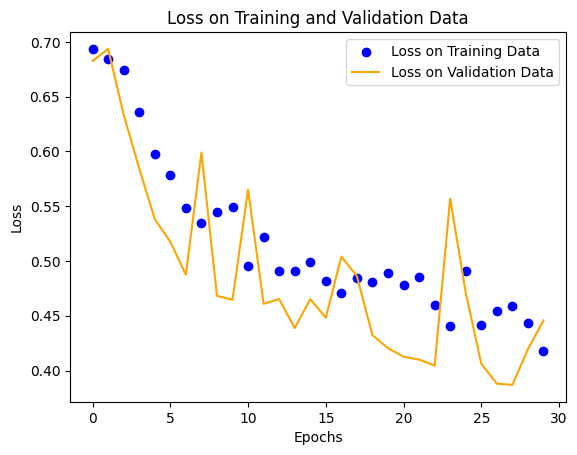

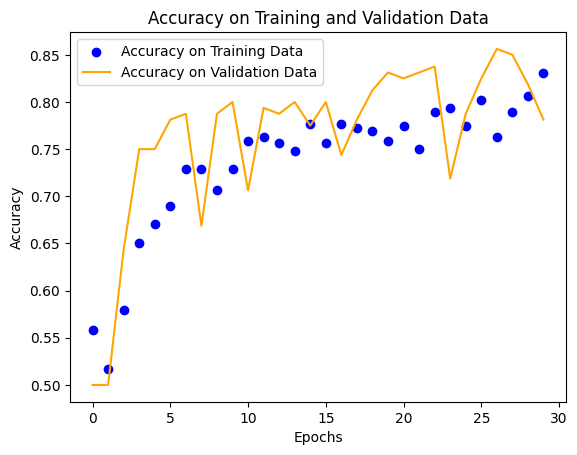

In [79]:
epochs = range(len(history1.history['loss']))
loss = history1.history['loss']
val_loss = history1.history['val_loss']
# plotting loss
plt.scatter(epochs, loss, color='blue', label='Loss on Training Data')
plt.plot(epochs, val_loss, color='orange', label='Loss on Validation Data')
plt.title('Loss on Training and Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history1.history['acc']
val_acc = history1.history['val_acc']
# plotting accuracy
plt.scatter(epochs, acc, color='blue', label='Accuracy on Training Data')
plt.plot(epochs, val_acc, color='orange', label='Accuracy on Validation Data')
plt.title('Accuracy on Training and Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Model prediction**

# Model prediction using test data

In [80]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_dir = '/content/drive/MyDrive/Colab Notebooks/actual_data/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle = False
)

Found 160 images belonging to 2 classes.


In [81]:
result = model1.evaluate(test_generator)
print("test loss, test accuracy:", result)

8/8 [==============================] - 4s 518ms/step - loss: 0.5304 - acc: 0.7188
test loss, test accuracy: [0.5304423570632935, 0.71875]


In [82]:
predict = model1.predict(test_generator, steps=test_generator.samples)
predict

  8/160 [>.............................] - ETA: 1:12

160/160 [==============================] - 4s 21ms/step


array([[0.08452415],
       [0.14021401],
       [0.09949595],
       [0.11643013],
       [0.12256143],
       [0.32406405],
       [0.09041905],
       [0.05463022],
       [0.10598079],
       [0.07412773],
       [0.08061839],
       [0.20917216],
       [0.10057007],
       [0.06019566],
       [0.06359013],
       [0.05122674],
       [0.3097542 ],
       [0.06629825],
       [0.10314929],
       [0.32404083],
       [0.0944631 ],
       [0.1931917 ],
       [0.08944675],
       [0.07746424],
       [0.17782508],
       [0.11504722],
       [0.07473695],
       [0.12181751],
       [0.16456877],
       [0.07689494],
       [0.07423975],
       [0.19704363],
       [0.16446708],
       [0.63740236],
       [0.10552341],
       [0.45302922],
       [0.10303732],
       [0.15189655],
       [0.04034011],
       [0.16579445],
       [0.04459551],
       [0.4153157 ],
       [0.08428026],
       [0.11384467],
       [0.21419781],
       [0.07407988],
       [0.1291826 ],
       [0.116

In [83]:
predicted_labels = np.where(predict > 0.5, 1, 0).flatten()

true_labels = test_generator.classes

df_test = pd.DataFrame({
    'file': test_generator.filenames,
    'true_label': true_labels,
    'predicted_label': predicted_labels
})

print(df_test)

                         file  true_label  predicted_label
0     no_panel/no_panel_0.png           0                0
1     no_panel/no_panel_1.png           0                0
2    no_panel/no_panel_10.png           0                0
3    no_panel/no_panel_11.png           0                0
4    no_panel/no_panel_12.png           0                0
..                        ...         ...              ...
155       panels/panel_81.png           1                0
156       panels/panel_82.png           1                0
157       panels/panel_87.png           1                0
158       panels/panel_89.png           1                0
159       panels/panel_94.png           1                0

[160 rows x 3 columns]


## Building a confusion matrix

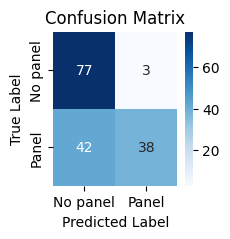

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df_test['true_label'], df_test['predicted_label'])

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No panel', 'Panel'], yticklabels=['No panel', 'Panel'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Model optimization

In [18]:
# increasing batchsize from 20 to 64
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 64,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 64,
    class_mode = 'binary'
)

Found 480 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [19]:
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data_batch shape: (64, 150, 150, 3)
labels batch shape (64,)


In [20]:
# Define the model
model = tf.keras.models.Sequential()

# Added 4 layers, dropout = 0.5
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [22]:
history = model.fit(
    train_generator,
    epochs=60,
    validation_data = validation_generator,
)

Epoch 1/60
8/8 [==============================] - 55s 7s/step - loss: 0.7321 - acc: 0.4854 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 2/60
8/8 [==============================] - 50s 6s/step - loss: 0.6903 - acc: 0.5042 - val_loss: 0.6774 - val_acc: 0.5000
Epoch 3/60
8/8 [==============================] - 46s 5s/step - loss: 0.6844 - acc: 0.5271 - val_loss: 0.6208 - val_acc: 0.6250
Epoch 4/60
8/8 [==============================] - 39s 4s/step - loss: 0.6258 - acc: 0.6812 - val_loss: 0.5336 - val_acc: 0.7937
Epoch 5/60
8/8 [==============================] - 35s 4s/step - loss: 0.5418 - acc: 0.7417 - val_loss: 0.5017 - val_acc: 0.7750
Epoch 6/60
8/8 [==============================] - 35s 4s/step - loss: 0.5074 - acc: 0.7500 - val_loss: 0.6064 - val_acc: 0.6938
Epoch 7/60
8/8 [==============================] - 38s 4s/step - loss: 0.5193 - acc: 0.7417 - val_loss: 0.4728 - val_acc: 0.8062
Epoch 8/60
8/8 [==============================] - 35s 5s/step - loss: 0.4789 - acc: 0.7729 - val_loss: 0

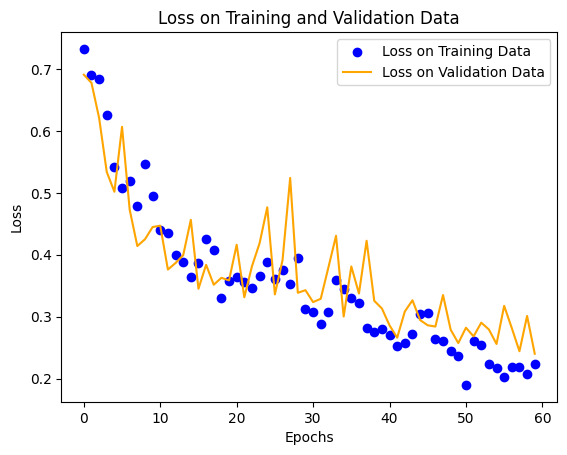

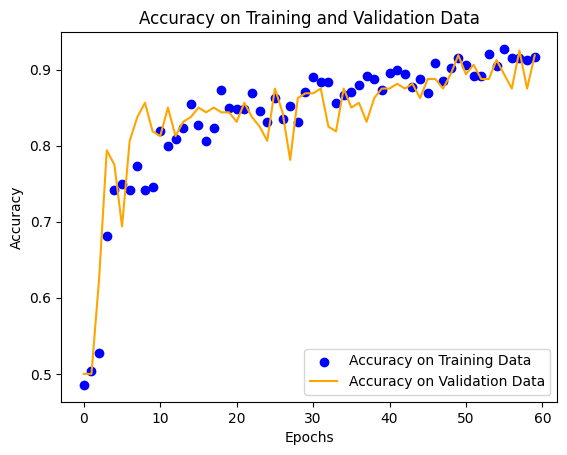

In [39]:
epochs = range(len(history.history['loss']))
loss = history.history['loss']
val_loss = history.history['val_loss']

# plotting loss
plt.scatter(epochs, loss, color='blue', label='Loss on Training Data')
plt.plot(epochs, val_loss, color='orange', label='Loss on Validation Data')
plt.title('Loss on Training and Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plotting accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.scatter(epochs, acc, color='blue', label='Accuracy on Training Data')
plt.plot(epochs, val_acc, color='orange', label='Accuracy on Validation Data')
plt.title('Accuracy on Training and Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_dir = '/content/drive/MyDrive/Colab Notebooks/actual_data/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary',
    shuffle=False
)


Found 160 images belonging to 2 classes.


In [59]:
result = model.evaluate(test_generator)
print("test loss, test accuracy:", result)

3/3 [==============================] - 3s 622ms/step - loss: 0.2681 - acc: 0.8938
test loss, test accuracy: [0.2680934965610504, 0.893750011920929]


In [60]:
predict = model.predict(test_generator, steps=test_generator.samples)
predict

  3/160 [..............................] - ETA: 1:37

160/160 [==============================] - 3s 8ms/step


array([[0.03178519],
       [0.04562306],
       [0.35394394],
       [0.17441094],
       [0.05851769],
       [0.04529896],
       [0.48100248],
       [0.14476532],
       [0.05710404],
       [0.04954096],
       [0.00920212],
       [0.65820724],
       [0.03375758],
       [0.10164867],
       [0.01531672],
       [0.00562121],
       [0.8911433 ],
       [0.01242177],
       [0.03608979],
       [0.03201577],
       [0.06459597],
       [0.1412442 ],
       [0.01837851],
       [0.02696848],
       [0.14985259],
       [0.01406058],
       [0.00684539],
       [0.1361328 ],
       [0.20058553],
       [0.01776684],
       [0.09302745],
       [0.05771241],
       [0.00613521],
       [0.3530893 ],
       [0.76029015],
       [0.33346125],
       [0.01185079],
       [0.09164044],
       [0.0185901 ],
       [0.1159671 ],
       [0.02680183],
       [0.98586553],
       [0.03723754],
       [0.26106772],
       [0.24276656],
       [0.03721518],
       [0.11327092],
       [0.023

In [63]:
predicted_labels = np.where(predict > 0.5, 1, 0).flatten()

true_labels = test_generator.classes

df_test1 = pd.DataFrame({
    'file': test_generator.filenames,
    'true_label': true_labels,
    'predicted_label': predicted_labels
})

print(df_test1)

                         file  true_label  predicted_label
0     no_panel/no_panel_0.png           0                0
1     no_panel/no_panel_1.png           0                0
2    no_panel/no_panel_10.png           0                0
3    no_panel/no_panel_11.png           0                0
4    no_panel/no_panel_12.png           0                0
..                        ...         ...              ...
155       panels/panel_81.png           1                1
156       panels/panel_82.png           1                1
157       panels/panel_87.png           1                1
158       panels/panel_89.png           1                1
159       panels/panel_94.png           1                1

[160 rows x 3 columns]


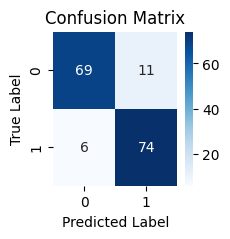

In [64]:
cm = confusion_matrix(df_test1['true_label'], df_test1['predicted_label'])

plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Identification classified images

                         file  true_label  predicted_label
0     no_panel/no_panel_0.png           0                0
1     no_panel/no_panel_1.png           0                0
2    no_panel/no_panel_10.png           0                0
3    no_panel/no_panel_11.png           0                0
4    no_panel/no_panel_12.png           0                0
..                        ...         ...              ...
155       panels/panel_81.png           1                1
156       panels/panel_82.png           1                1
157       panels/panel_87.png           1                1
158       panels/panel_89.png           1                1
159       panels/panel_94.png           1                1

[143 rows x 3 columns]


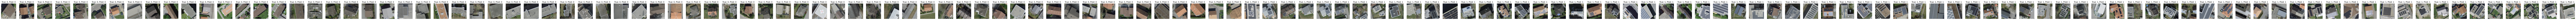

In [69]:
from PIL import Image

classified = df_test1[df_test1['true_label'] == df_test1['predicted_label']]

print(classified)

num_classified = len(classified)
plt.figure(figsize=(300, 300))
for i, row in enumerate(classified.itertuples(), start=1):
    img_path = os.path.join(test_dir, row.file)
    img = Image.open(img_path)
    plt.subplot(1, num_classified, i)
    plt.imshow(img)
    plt.title(f"True: {row.true_label}, Pred: {row.predicted_label}")
    plt.axis('off')
plt.show()